In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Sklearn functionality
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df =pd.read_csv("titanic_clean.csv")
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.shape


(891, 21)

In [4]:
df.dtypes

Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Sex_female        int64
Sex_male          int64
Embarked_C        int64
Embarked_Q        int64
Embarked_S        int64
Embarked_nan      int64
Deck_A            int64
Deck_B            int64
Deck_C            int64
Deck_D            int64
Deck_E            int64
Deck_F            int64
Deck_G            int64
Deck_T            int64
Deck_nan          int64
dtype: object

In [5]:
df.isnull().sum().sort_values()

Survived        0
Deck_G          0
Deck_F          0
Deck_E          0
Deck_D          0
Deck_C          0
Deck_B          0
Deck_A          0
Embarked_nan    0
Deck_T          0
Embarked_S      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Age             0
Pclass          0
Embarked_Q      0
Deck_nan        0
dtype: int64

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,...,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,...,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
import matplotlib.pyplot as plt

In [10]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show()   

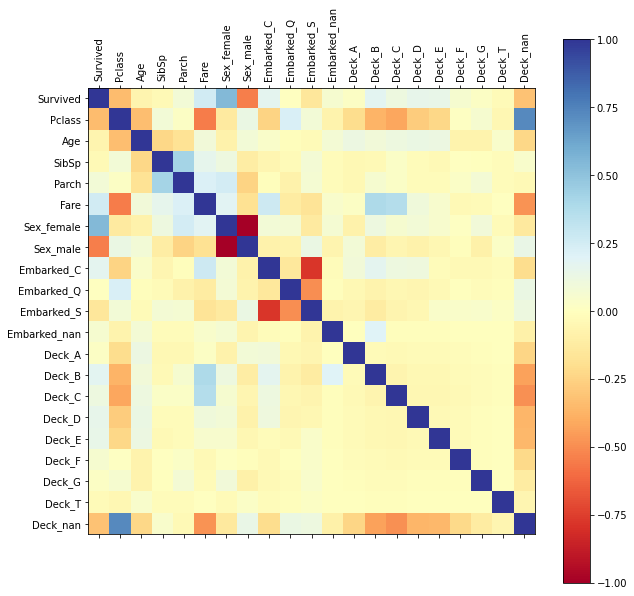

In [11]:
correlationMatrix(df)

Prepare Data
Select features and split into input and target features
Split the features into X (the input features) and y (the target feature).

In [14]:
df.columns
 


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan'],
      dtype='object')

In [15]:
y= df['Survived']
X =df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan']]

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, columns=X.columns)

In [18]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,0.418036,0.163383,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=27)

In [24]:
model_ds = DecisionTreeClassifier()
model_ds = model_ds.fit(X_train,y_train)

In [43]:
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
preditions_ds = model_ds.predict(X_train)
print(accuracy_score(y_train,preditions_ds))

0.988255033557047


In [29]:
preditions_Lg = model.predict(X_train)
print(accuracy_score(y_train,preditions_Lg))

0.802013422818792


In [30]:
preditions_ds = model_ds.predict(X_test)
print(accuracy_score(y_test,preditions_ds))

0.7593220338983051


In [31]:
preditions_Lg = model.predict(X_test)
print(accuracy_score(y_test,preditions_Lg))

0.7932203389830509


Choose the best performing model
Logistic Regression model will be our chosen model as it performed the best.

In [32]:
model = model_Lg

In [33]:
def decisionTreeSummary(model, column_names):
    '''Show a summary of the trained decision tree model'''

    # Plot the feature importances as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Decision tree feature importance', fontsize=16)
    rects = plt.barh(column_names, model.feature_importances_,color="khaki")

    # Annotate the bars with the feature importance values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left', va='bottom')    

    plt.show()

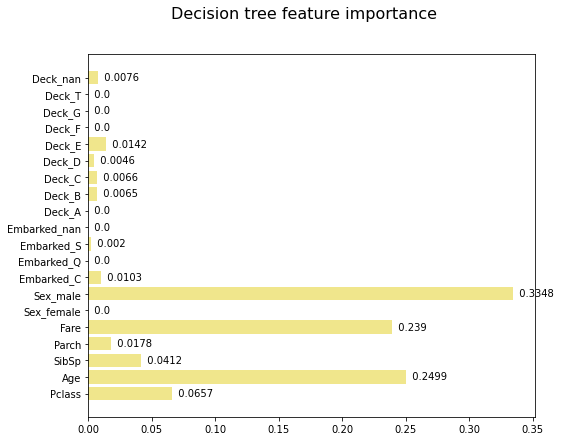

In [34]:
decisionTreeSummary(model_ds,X.columns)

In [35]:
def logisticRegressionSummary(model, column_names):
    '''Show a summary of the trained logistic regression model'''

    # Get a list of class names
    numclasses = len(model.classes_)
    if len(model.classes_)==2:
        classes =  [model.classes_[1]] # if we have 2 classes, sklearn only shows one set of coefficients
    else:
        classes = model.classes_

    # Create a plot for each class
    for i,c in enumerate(classes):
        # Plot the coefficients as bars
        fig = plt.figure(figsize=(8,len(column_names)/3))
        fig.suptitle('Logistic Regression Coefficients for Class ' + str(c), fontsize=16)
        rects = plt.barh(column_names, model.coef_[i],color="lightblue")
        
        # Annotate the bars with the coefficient values
        for rect in rects:
            width = round(rect.get_width(),4)
            plt.gca().annotate('  {}  '.format(width),
                        xy=(0, rect.get_y()),
                        xytext=(0,2),  
                        textcoords="offset points",  
                        ha='left' if width<0 else 'right', va='bottom')        
        plt.show()
        #for pair in zip(X.columns, model_lr.coef_[i]):
        #    print (pair)

In [44]:
model_Lg.classes_

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [41]:
model_Lg.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [45]:
logisticRegressionSummary(model_Lg, X.columns)

AttributeError: 'LogisticRegression' object has no attribute 'classes_'